In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<font size=6>**Classical Statistics II**</font>


## Why test hypotheses and estimate parameters?

**Observations** are measurements of the properties of natural objects, and may provide insights for new theories.

**Theories** are **potential** models describing how things work. **Good theories** come with predictions on the observed properties of unseen objects.

To learn something new about the Universe we need to find ways to answer to questions such as:
- does our new theory agree with the data (Hypothesis testing), or
- what are the parameters of an existing theory (Inference on Parameters), or
- which theory is more probable (Model Comparison; we'll see that in a following session)


# Hypothesis testing

**Definition**

Hypothesis testing is the process of testing an assumption regarding a parameter of a population, using a sample from the latter.

**Testing the value of a parameter...***

...means that we need to quantify the probability (density) of the parameter using a **statistic** calculated on the sample.

## Example: the sum of two independently and identically-distributed normal variables

Let's assume that we have two data points with values $x$ and $y$, coming from the same normal distribution $N(\mu,\sigma)$, consequently:

$$ P_X(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[-\frac{\left(x-\mu\right)^2}{2\sigma^2}\right]$$

$$ P_Y(y) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[-\frac{\left(y-\mu\right)^2}{2\sigma^2}\right]$$

What is the probability density function of their sum, $x+y$ as a function of the data distribution parameters, $\mu$ and $\sigma$?


### Any thoughts?

$$ P_Z(z) = Prob(x+y=z) = Prob(x=0, y=z) + Prob(x=0.1, y=z-0.1) + ... $$

so...

$$ P_Z(z) = \int\limits_{-\infty}^{\infty} P_X(x) P_Y(z-x) \; dx 
=   \int\limits_{-\infty}^{\infty} 
    \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[-\frac{\left(x-\mu\right)^2}{2\sigma^2}\right]
    \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[-\frac{\left(z-x-\mu\right)^2}{2\sigma^2}\right]
     \; dx 
$$

(...after one page of math...)

$$ P_Z(z) = \frac{1}{\sqrt{4\pi \sigma^2}} \exp\left[-\frac{\left(z-2\mu\right)^2}{4\sigma^2}\right] $$

Does it seem familiar? If we use $\sigma' = \sqrt{2} \sigma$...

$$ P_Z(z) = \frac{1}{\sqrt{2\pi \sigma'^2}} \exp\left[-\frac{\left(z-2\mu\right)^2}{2\sigma'^2}\right] $$

...so it's a normal distribution peaking at $2\mu$ (naturally...), with a standard deviation $\sqrt{2}$ times **higher** than that of the data distribution!

Similarily, the mean value of the sample, since it's divided by 2, will have a mean value of $\mu$, and a standard deviation $\sqrt{2}$ times **lower** than that of the data distribution.

## Hypothesis testing

Having quantified the probability density of the statistic, we can use the sum of two data points to test whether their sum is probable, or what is the probability of that being less or more than a specific value (e.g., 0).

### Example


Two values from the data distribution: [3.0432204  4.88535827]


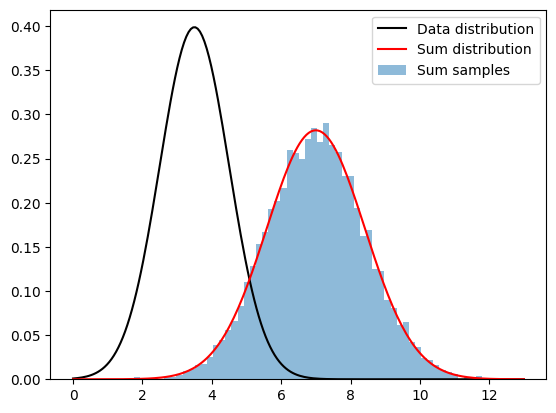

In [36]:
import scipy.stats as st
data_mean = 3.5
data_std = 1.0
data_dist = st.norm(data_mean, data_std)
print("Two values from the data distribution:", data_dist.rvs(size=2))

sum_dist = st.norm(2 * data_mean, 2**0.5 * data_std)

n_samples = 10000
sum_sample = data_dist.rvs(size=(n_samples, 2)).sum(axis=1)

xx = np.linspace(0.0, 13.0, 200)
plt.figure()
plt.plot(xx, data_dist.pdf(xx), "k-", label="Data distribution")
plt.plot(xx, sum_dist.pdf(xx), "r-", label="Sum distribution")
plt.hist(sum_sample, bins="fd", density=True, alpha=0.5, label="Sum samples")
plt.legend(loc="upper right")
plt.show()

## What if we had two samples with a sum of 4?

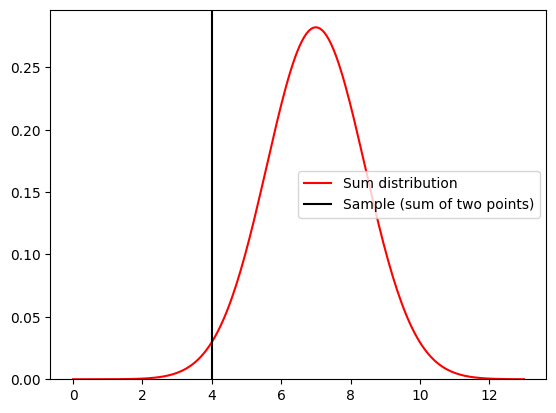

In [49]:
xx = np.linspace(0.0, 13.0, 200)
plt.figure()
plt.plot(xx, sum_dist.pdf(xx), "r-", label="Sum distribution")
plt.axvline(4.0, color="k", label="Sample (sum of two points)")
plt.legend(loc="center right")
plt.ylim(ymin=0.0)
plt.show()

# Example: Verifying a model for the mass of globular clusters (GC)

## 1. The data

A research team has studied a sample of globular clusters and measured their masses. Let's load and plot their histogram.

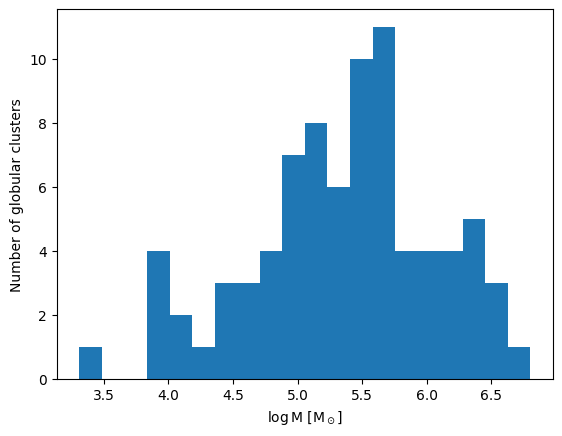

In [20]:
import numpy as np
import matplotlib.pyplot as plt


masses = np.genfromtxt("data/GC_MWG_masses.csv")
log_masses = np.log10(masses)


plt.figure()
plt.hist(log_masses, bins=20)
plt.xlabel("$\log M\ [M_\odot]$")
plt.ylabel("Number of globular clusters")
plt.show()

## 2.1. The theoretical model

Globis & Clusterton (2022) used hydrodynamical galaxy simulations to model the formation of globular clusters (GC) in a galaxy like the Milky Way. They found that the masses of the synthetic GCs are described by a log-normal distribution. Namely, the logarithm of the masses are normally distributed:

$$\large \log_{10} \left(\frac{M}{M_\odot}\right) \sim \mathcal{N}(5.5, 1) $$

meaning that the GCs masses peak at $10^{5.5} M_\odot \simeq 3.2\times 10^5 M_\odot$ and the typical scatter is $1\,\mathrm{dex}$ (one order of magnitude).

Let's see this the model along with the data...

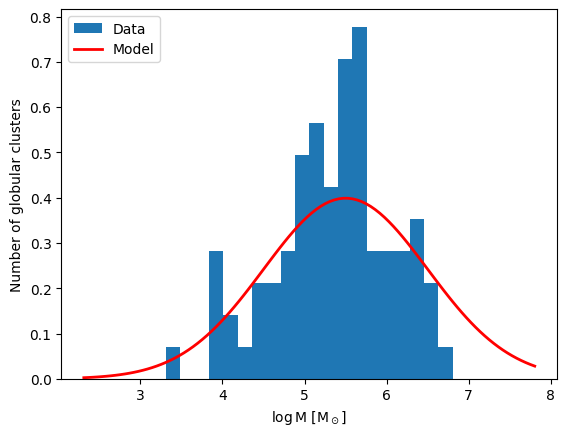

In [18]:
import scipy.stats as st

model_mean = 5.5
model_std = 1.0

logm_for_plot = np.linspace(min(log_masses)-1, max(log_masses)+1, 100)
model_prob_for_plot = st.norm(model_mean, model_std).pdf(logm_for_plot)

plt.figure()
plt.hist(log_masses, bins=20, density=True, label="Data")
plt.plot(logm_for_plot, model_prob_for_plot, "r-", lw=2, label="Model")
plt.xlabel("$\log M\ [M_\odot]$")
plt.ylabel("Number of globular clusters")
plt.legend(loc="upper left")
plt.show()

In [19]:
sample_mean = np.mean(log_masses)
sample_std = np.std(log_masses)

print(f"MODEL:  Mean = {model_mean:.2f} | Std = {model_std:.2f}")
print(f"SAMPLE: Mean = {sample_mean:.2f} | Std = {sample_std:.2f}")

MODEL:  Mean = 5.50 | Std = 1.00
SAMPLE: Mean = 5.35 | Std = 0.72


<font size=3><u>**In-class discussion: is the sample mean close to the model's value?**</u><font>

_Discuss with your teammate, then report._

<details>
<summary><b>[Spoiler]</b></summary>
<br>
There is no right answer... it is subjective. Our goal here is to quantify this "subjectiveness"!
<br>

<font size=3><u>**In-class discussion: does the standard deviation give a sense of how close the mean values are?**</u><font>

_Discuss with your teammate, then report._

<details>
<summary><b>[Spoiler]</b></summary>
<br>
Not exactly. The standard deviation describes the scatter of the data. Itself does not say much about the deviation of the sample mean from the model's expectation.
<br>


## 2.2. Standard error of the mean

Whether the mean values are close depends also on the sample size. The larger it is, the more accurate our estimate on the mean is, and we would expect it to converge to the mean of the underlying population (and that of the model if it is correct). 

For normally distributed data the **standard deviation of the mean** scales as:

$$ \large \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}} $$

where $\sigma$ is the population standard deviation and $N$ is the sample size.

In most cases, the population deviation is unknown. For this reason, we use the same sample to estimate it, calculating the *sample standard deviation $s$*. The standard deviation of the sample mean is called **standard error on the mean**:

$$ \large s_{\bar{x}} = \frac{s}{\sqrt{N}} $$

The sample mean is considered to be normally distributed (see *Central Limit Theorem* below), and therefore we can calculate the number of standard errors the sample mean is away from the theoretical value, or the **sigmas**.

Standard error of the mean = 0.08
Sigma's of difference      : 1.80


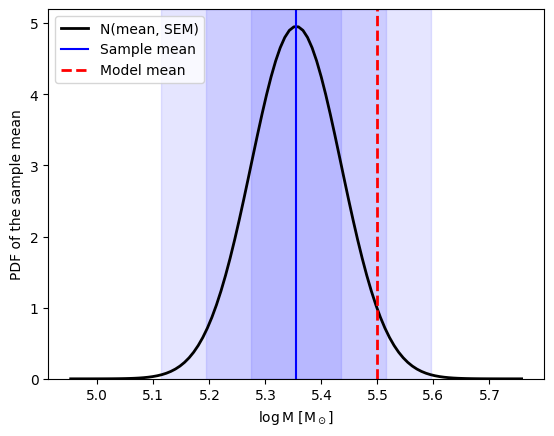

In [5]:
sample_sem = st.sem(log_masses)
print(f"Standard error of the mean = {sample_sem:.2f}")
print(f"Sigma's of difference      : {(model_mean-sample_mean) / sample_sem:.2f}")

x_plot = np.linspace(sample_mean - 5 * sample_sem, sample_mean + 5 * sample_sem, 100)
mean_distribution = st.norm(sample_mean, sample_sem)
y_plot = mean_distribution.pdf(x_plot)
plt.figure()
plt.plot(x_plot, y_plot, "k-", lw=2, label="N(mean, SEM)")
plt.axvline(sample_mean, ls="-", color="b", label="Sample mean")
plt.axvline(model_mean, ls="--", lw=2, color="r", label="Model mean")
for sigmas in [1, 2, 3]:
    plt.axvspan(sample_mean - sigmas*sample_sem, sample_mean + sigmas*sample_sem, color="b", alpha=0.1)
plt.legend(loc="upper left")
plt.ylim(ymin=0.0)
plt.xlabel("$\log M\ [M_\odot]$")
plt.ylabel("PDF of the sample mean")
plt.show()

<font size=3><u>**In-class discussion: is the means' difference small enough to accept the model?**</u><font>

_Discuss with your teammate, then report._

<details>
<summary><b>[Spoiler]</b></summary>
<br>
Still subjective! But we are closer to quantifying this "subjectiveness"!
<br>

## 2.3. When to reject a model...

One might argue that if the theoretical mean is too extreme, either **too low** or **two high**, we should **reject the hypothesis that the model describes the data at hand**. 

Therefore we can calculate from the sample mean distribution what is the probability of such extreme values.

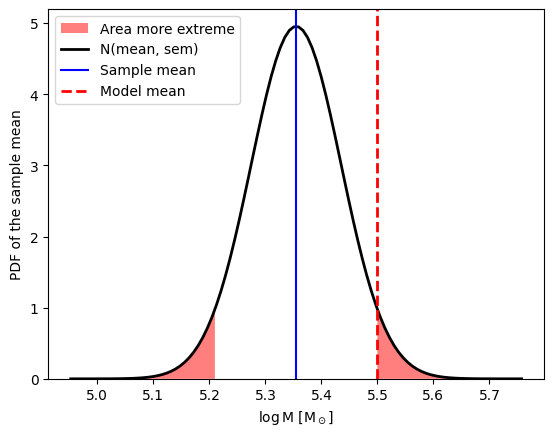

In [6]:
x_plot = np.linspace(sample_mean - 5 * sample_sem, sample_mean + 5 * sample_sem, 100)

diff = abs(sample_mean - model_mean)
xx_before = np.linspace(sample_mean - 5 * sample_sem, sample_mean - diff, 100)
xx_after = np.linspace(sample_mean + diff, sample_mean + 5 * sample_sem, 100)

mean_distribution = st.norm(sample_mean, sample_sem)
y_plot = mean_distribution.pdf(x_plot)

plt.figure()
plt.fill_between(xx_before, mean_distribution.pdf(xx_before), 0, color="r", ec="none", alpha=0.5, label="Area more extreme")
plt.fill_between(xx_after, mean_distribution.pdf(xx_after), 0, color="r", ec="none", alpha=0.5)
plt.plot(x_plot, y_plot, "k-", lw=2, label="N(mean, sem)")
plt.axvline(sample_mean, ls="-", color="b", label="Sample mean")
plt.axvline(model_mean, ls="--", lw=2, color="r", label="Model mean")
plt.legend(loc="upper left")
plt.ylim(ymin=0.0)
plt.xlabel("$\log M\ [M_\odot]$")
plt.ylabel("PDF of the sample mean")
plt.show()

The cumulative distribution function is

$$ \large F(x) = \int\limits_{-\infty}^{x} f(x') dx' $$

The "area more exteme" is 

$$
\begin{align}
\large p   
    &= \large 1 - \textrm{(area between)} = \\
    &= 1 - \int\limits_{m-d}^{m+d} f(x') dx' = \\
    &= 1 - \left(\int\limits_{-\infty}^{m+d} f(x')dx' - \int\limits_{\infty}^{m-d} f(x')dx' \right) = \\
    &= \large 1 - \left[F(m+d) - F(m-d)\right]
\end{align}
$$

which in our case is...

In [7]:
area_more_extreme = 1 - (mean_distribution.cdf(sample_mean+diff) - mean_distribution.cdf(sample_mean-diff))
print(f"Area more extreme, p = {area_more_extreme:.4f}")

Area more extreme, p = 0.0716


In other words, there is $\sim 7\%$ probability, or **$p$-value**, to reject this model even if it is correct. *Can we risk it*? It is **our choice** to consider our "threshold" or **significance level**!

If we had decided **before looking at the data** to use a 5% threshold, then our conclusion is that 

> *we do not reject the model, with a significance level of 5%".*

#### IMPORTANT: we didn't accept the model
The analysis above does not validate the model!!! The only thing we verified is that **one property**, the mean value the data is not that different than what we would expect from the model. If it was, then we would have reasons to no believe the model. For example, if we had found $p=0.0001$ we would **reject the model** given the sample at hand.


#### IMPORTANT: 7% is not the probablity for the hypothesis (or model) to be correct
There are infinite other models under which the $p$-value above would be above our threshold. For example, $N(5.5, 0.101)$, $N(5.51, 0.1)$, ...

### Choosing the significance level

There is no rule on what the significance level should be. Just that is should be decided before looking at the data, to avoid, **as humans, biasing our conclusions by relaxing our criteria for models we like, or making it harder for models we don't like!**

In Astronomy, $2 + 2 \simeq 5$, so we often use 0.5, 1 or 5%. In Nuclear physics and precision experiments often $10^{-7}$ or $10^{-10}$ are used!

Since the $p$-value is connected to the number of sigmas in difference, often we refer to *sigmas* instead of a significance level. It is shorter to say, and it is easier to "imagine" it in plots with error bars and distributions. For example:

| Sigmas | Probability (inside) | Probability (outside) |
| --- | --- | --- |
|  1 | 0.68 | 0.32 |
|  2 | 0.954 | 0.046 |
|  3 | 0.9973 | 0.0027 |
|  5 | 0.9999994 | 0.0000006 |
|  8 | 0.9999999999999987 | 0.0000000000000013

<font size=3><u>**In-class discussion: what does it mean to have a 10-sigma particle detection? Is it good that the significance level is very small?**</u><font>

_Discuss with your teammate, then report._

<details>
<summary><b>[Spoiler]</b></summary>
<br>
Never judge before considering what is the null hypothesis! Previously, we checked a specific model, and therefore our null hypothesis was that the data agree with it (at least their mean).

In particle detectors, the null hypothesis is usually: the signal was noise! There we test whether the data came about randomly. Rejecting that a signal is noise with significance level of 0.0000000000000000000015% is not bad at all!
<br>

## 2.4. In the language of Statistics: *Hypothesis testing*

> **Step 1**: We define the **null hypothesis** or the statement that we will test (a model or random outcome)

> **Step 2**: We decide on a **significance level** - or what is the "probability for being wrong in rejecting the null hypothesis" that we are comfortable with?

> **Step 3**: The **statistic** - a quantitiy that is computed on our *sample* assuming the *hypothesis is true*

> **Step 4**: **$p$-value** OR **critical value**: compute the "probability of being wrong" or the value of the statistic based on which we will reject the hypothesis or not

> **Step 5**: the decision!


### Step 1. We define the null hypothesis

> $H_0$: the mean value of the decimal logarithm of the masses of Milky Way GCs is consistent with the model

### Step 2. We decide on a significance level

This is the probability for rejecting the null hypothesis if it is true - the "probability of being wrong" if we reject the hypothesis at the end.

> Let's take a significance level of $5\%$, i.e. $a = 0.05$

### Step 3. The statistic, $Z$-score

#### Note: since we know it, we use the population standard deviation

In order to decide whether the sample mean is consistent with the model's prediction, we must compute the **distribution of the sample mean given that the model is correct.**

For $N$ observations $x_i$ the sample mean, $\bar{x}$ is

$$ \bar{x} = \frac{1}{N} \sum\limits_{i=1}^{N} x_i$$

For normally distributed observations, $x_i \sim \mathcal{N}(\mu, \sigma)$, it is known that the sample mean is also normally distributed with mean equal to the population mean ($\mu$) and standard deviation equal to the population standard deviation ($\sigma$) devided by the square root of the size of the sample ($N$):

$$ \bar{x} \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{N}\right)$$

...called *standard deviation of the mean*:

$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{N}}$$

Therefore the probability density function (PDF) of the sample mean is:

$$f(\bar{x}) = \frac{1}{\sqrt{2\pi \ \sigma_{\bar{x}}^2}} \exp\left[-\frac{\left(\bar{x} - \mu\right)^2}{2 \ \sigma_{\bar{x}}^2}\right]$$

Because of the ability to shift and scale the normal distribution, the quantity

$$ Z = \frac{\bar{x} - \mu}{\sigma_{\bar{x}}} $$

follows the standard normal distribution (i.e. mean value $0$ and standard deviation $1$):

$$ f(Z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}Z^2}$$

Therefore, by just computing the $Z$ *score* of our sample, $z$, we can easily use tables for the normal distribution or code to quickly compute the probability at which $Z$ is below or above a specific value.

We call this value $Z$ *statistic* or *score* and it used whenever the quantity we use to test the hypothesis is normally distributed.

### Step 4. $p$-value and critical value(s) for the statistic


<div><img src="images/two_tailed.png" width="500"/></div>


Because of the null hypothesis, we must convert the statement "*consistent with...*" to a mathematical statement. In this example, we can consider that the sample mean is inconsistent with the model prediction if its significantly lower or higher (see *two tail test* instead of *one tail test*).

Therefore, the Type I error is equal to probability that the $Z$ score deviates more than the absolute deviation of the score for the sample at hand:

$$ p = P(Z > |z|) + P(Z < -|z|) $$

Using the symmetry of normal distribution's PDF and the fact that $P({\rm A}) + P({\rm not\ A}) = 1$, we arrive at

$$ p = \cdots = 2 \left(1 - P\left(Z < |z|\right)\right) = \cdots = 2 P(Z < -|z|)$$

or simply,

$$ p = 2 \Phi(-|z|) $$

where $\Phi(z)$ is the CDF of the standard normal distirbution.

If we find $p < a = 0.05$ then we reject the null hypothesis.

Alternatively, we can set **critical** values of the $Z$ score that correspond to the significance level of choice. As rejection should occur either for higher or lower values (two-tailed test), we find two critical values corresponding to $a/2$ probability:

$$ Z_{\rm crit,1} = \Phi^{-1}\left(\frac{a}{2}\right) = -1.96 $$

$$ Z_{\rm crit,2} = \Phi^{-1}\left(1 - \frac{a}{2}\right) = +1.96 $$

Because of the symmetry of the normal distribution we could also compute a critical value for the absolute $Z$ score:

$$ |Z|_{\rm crit} = 1.96 $$

This is equivalent to asking *how many **sigmas** away from the model prediction can the measured value be in order to reject the null hypotheis?* Astronomers are used to use the $\sigma$ term: "we reject the hypothesis on a $2\sigma$ significance level!"

### Step 5. Decision

Now that we defined all the steps, we can apply it on the data. In the following code, we compute the statistic and print the outcome based on $p$-value. Alternatively we can use the critical value.

## 2.5. $Z$-test 

Let's do the above with code, assuming we know the population standard deviation.

In [37]:
# set alpha and compute the critical value(s)
alpha = 0.05
print("Significance level: {:7.3f}".format(alpha))

# compute the p-value and report the result
sample_size = len(log_masses)
sample_mean = np.mean(log_masses)
stddev_mean = model_std / (sample_size ** 0.5)
z_score = (sample_mean - model_mean) / stddev_mean
pvalue = 2 * st.norm(0, 1).cdf(-abs(z_score))

print("Sample mean       : {:7.3f}".format(sample_mean))
print("Standard error    : {:7.3f}".format(stddev_mean))
print("Sample Z-score    : {:7.3f}".format(z_score))
print()
print("p-value           : {:7.3g}".format(pvalue))

if pvalue <  alpha:
    print("    ...we reject the null hypothesis. ****")
else:
    print("    ...we cannot reject the null hypothesis. ****")
    
print()

# alternatively we could compute the critical value and base our outcome on it
z_critical = abs(st.norm.ppf(alpha / 2.0))
print("Critical values   : {:7.3f} and {:.3f}".format(-z_critical, z_critical))
if abs(z_score) > abs(z_critical):
    print("    ...we reject the null hypothesis. ****")
else:
    print("    ...we cannot reject the null hypothesis. ****")

Significance level:   0.050
Sample mean       :   5.355
Standard error    :   0.111
Sample Z-score    :  -1.306

p-value           :   0.192
    ...we cannot reject the null hypothesis. ****

Critical values   :  -1.960 and 1.960
    ...we cannot reject the null hypothesis. ****


## 2.6 $t$-test

Above we used the theoretical value of $\sigma$ to calculate the $Z$-score. We **assumed** that we know the standard deviation of the population! In most cases, we don't! Instead, we **estimate** the population parameter $\sigma$ from the standard deviation in the sample $s$.

*Caveat: we are using the same values to calculate the mean and the standard deviation - therefore there is one less degree of freedom in the statistic*:

$$ \large \text{dof} = n - 1 $$

> Is the mean value of a sample equal to the population mean (without knowing the population standard deviation)?

The distribution of the sample mean now follows the Student's $t$-distribution.

The corresponding statistic is

$$ \large t = \frac{\bar{x} - \mu}{s / \sqrt{n}} $$

where $s$ is the sample standard deviation that takes the place of the population standard deviation in the $Z$-test we saw previously. The $t$-distribution is similar to the Gaussian but has 'heavier' tails when the sample size is small.

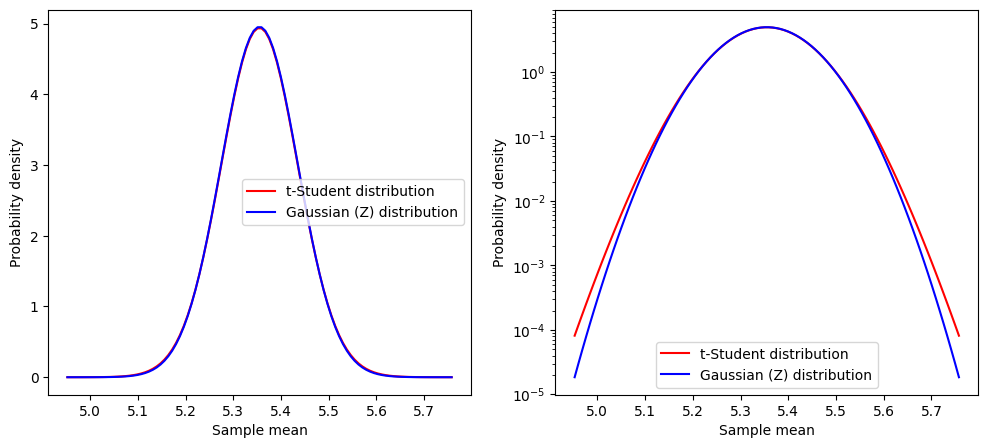

Sample t-score    :  -1.802
p-value           :  0.0753
    ...we cannot reject the null hypothesis. ****

Critical values   :  -1.990 and 1.990
    ...we cannot reject the null hypothesis. ****


In [38]:
x_plot = np.linspace(sample_mean - 5 * sample_sem, sample_mean + 5 * sample_sem, 100)

dof = len(log_masses) - 1
Z_dist = st.norm(loc=sample_mean, scale=sample_sem)
t_dist = st.t(dof, loc=sample_mean, scale=sample_sem)

plt.figure(figsize=(12, 5))
for inlog, subplot_index in zip([False, True], [1, 2]):
    plt.subplot(1, 2, subplot_index)
    plt.plot(x_plot, t_dist.pdf(x_plot), "r", label="t-Student distribution")
    plt.plot(x_plot, Z_dist.pdf(x_plot), "b", label="Gaussian (Z) distribution")
    plt.xlabel("Sample mean")
    plt.ylabel("Probability density")
    plt.legend(loc="best")
    if inlog:
        plt.yscale("log")
plt.show()

t_score = (sample_mean - model_mean) / sample_sem
p_value = 2 * st.t(dof).cdf(-abs(t_score))  # implied that loc=0, scale=1

print("Sample t-score    : {:7.3f}".format(t_score))
print("p-value           : {:7.3g}".format(p_value))

if pvalue <  alpha:
    print("    ...we reject the null hypothesis. ****")
else:
    print("    ...we cannot reject the null hypothesis. ****")
    
print()

# alternatively we could compute the critical value and base our outcome on it
t_critical = abs(st.t(dof).ppf(alpha / 2.0))
print("Critical values   : {:7.3f} and {:.3f}".format(-t_critical, t_critical))
if abs(t_score) > abs(t_critical):
    print("    ...we reject the null hypothesis. ****")
else:
    print("    ...we cannot reject the null hypothesis. ****")


<font size=3><u>**In-class discussion: how and why did $p$ and critical values change?**</u><font>

_Discuss with your teammate, then report._

<details>
<summary><b>[Spoiler]</b></summary>
<br>
The $p$-value is smaller because the sample standard deviation is smaller than the model one, leading to smaller $\sigma/\sqrt{N}$ too. Consequently, the difference between the means is statistically more significant compared to the $Z$-test!
    
For the same significance level, the critical values of the $t$-statistic have larger absolute values than the $Z$-statistic because the $t$-Student distribution is broader. In principle, larger differences between the means are tolerated when we don't know the standard deviation.
<br>

# Exercise 1: Directly performing the t-student test

Open the `scipy` documentation of the t-test function in https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html and complete the following code to perform the hypothesis testing.

In [39]:
statistic, pvalue = st.ttest_1samp(log_masses, model_mean)
print("Statistic = {:.3g}".format(statistic))
print("p-value   = {:.3g}".format(pvalue))

Statistic = -1.8
p-value   = 0.0753


## 2.7. The Central Limit Theorem

In the above example we assumed that the mean of the sample is normally-distributed, i.e. following the Gaussian distribution. This is often the case, at least with some approximation due to the **Central Limit Theorem**:

> the sampling distribution of the sample mean approaches a normal distribution as the sample size gets larger, no matter what the shape of the population distribution.

Let's take the *arcsine* distribution which does not look like a Gaussian at all...

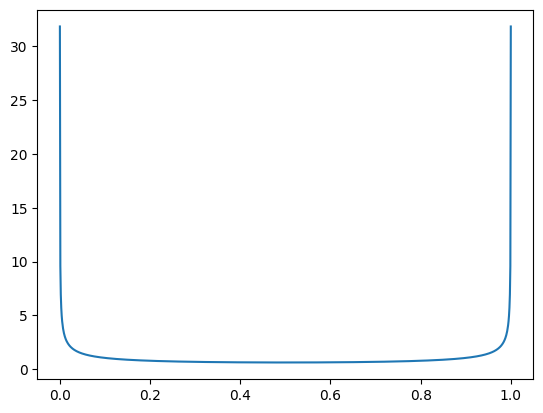

In [40]:
distribution = st.arcsine()
xx = np.linspace(0.0001, 1.0-0.0001, 1000)
plt.figure()
plt.plot(xx, distribution.pdf(xx))
plt.show()

![...](images/thats-just-not-normal.jpg)

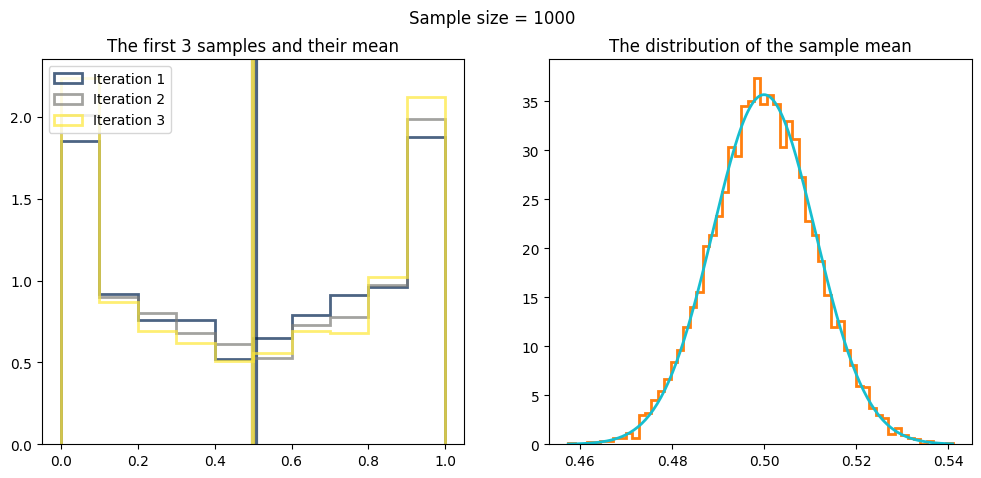

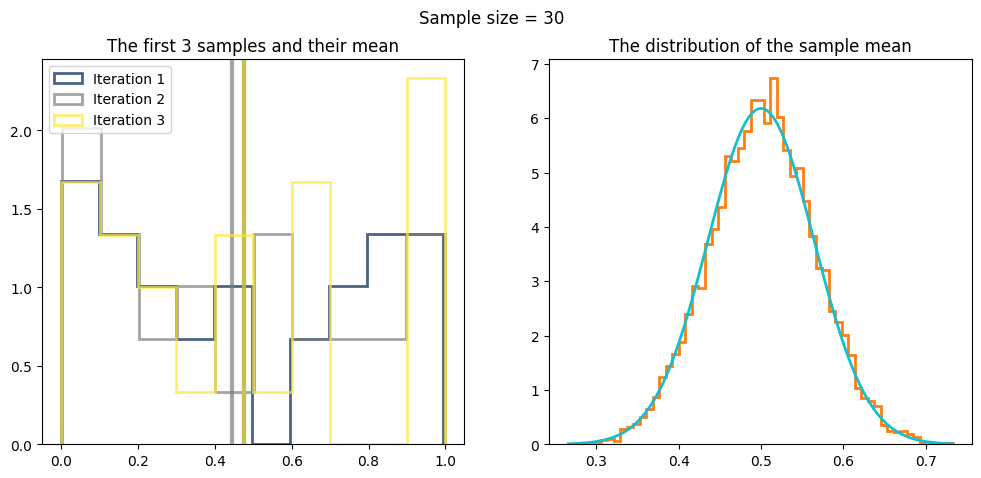

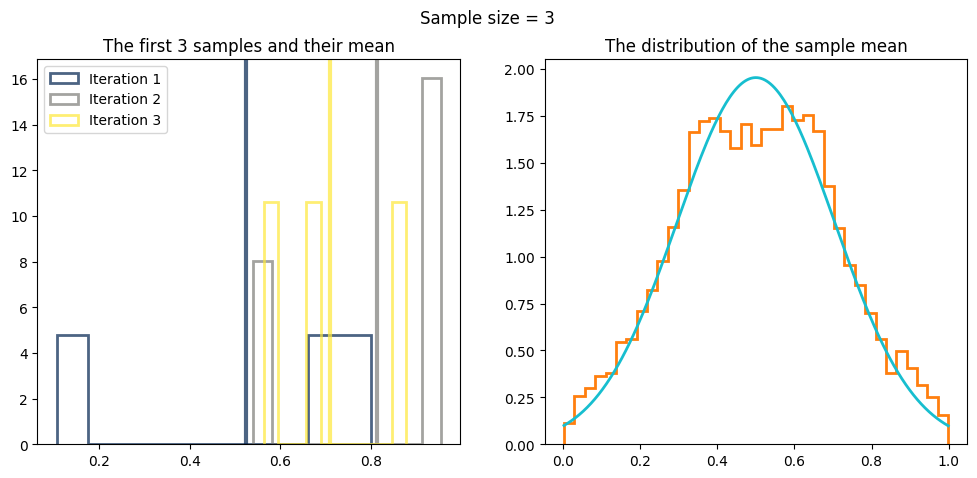

In [41]:
n_of_iterations = 10000
n_of_examples = 3
hist_colors = plt.colormaps.get_cmap("cividis")(np.linspace(0, 1, n_of_examples))
sample_sizes = [1000, 30, 3]

np.random.seed(2023)

for sample_size in sample_sizes:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=False)
    plt.suptitle(f"Sample size = {sample_size}")   
    ax1.set_title(f"The first {n_of_examples} samples and their mean")
    ax2.set_title(f"The distribution of the sample mean")
    
    examples_shown = 0
    sample_means = []
    for iteration in range(n_of_iterations):
        sample = distribution.rvs(size=sample_size)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
        
        if examples_shown < n_of_examples:
            ax1.hist(sample, bins=10, density=True, histtype="step",
                     color=hist_colors[iteration], alpha=0.7, lw=2, label=f"Iteration {iteration+1}")
            ax1.axvline(sample_mean, color=hist_colors[iteration], lw=3, alpha=0.7)
            examples_shown += 1
    ax1.legend(loc="upper left")

    ax2.hist(sample_means, bins="fd", histtype="step", density=True, color="C1", lw=2)
    xx = np.linspace(min(sample_means), max(sample_means), 200)
    ax2.plot(xx, st.norm.pdf(xx, distribution.mean(), distribution.std() / sample_size**0.5), lw=2, color="C9")
    plt.show()

## 2.8. Distribution tests

###  Normality test

Above we used our eyes to see the validity of the Central Limit Theorem. But are eyes, and our plotting choices (e.g., bin sizes) play tricks! Instead, we can test whether a sample follows a known distribution.

In addition, in the hypothesis test, we assumed that the data are normally distributed. This is an expectation from the theory, and in could be tested independently of the parameters of the Gaussian distribution.

When our analysis depends on the "normality" of a distribution, it is better the perform a hypothesis test for exactly that - a **noramlity test**!

Here we use the **Shapiro-Wilk test for normality** (but it's not the only one out there) to test whether the log-masses of the GCs are following the normal distribution.

We **always have to ask which one is the null hypothesis test when using them as a black box**. For Shapiro-Wilk is:

>  $H_0$: the sample came from a normally distributed population

In [42]:
st.shapiro(log_masses)

ShapiroResult(statistic=0.983458936214447, pvalue=0.38180243968963623)

### Arbitrary distribution test: the K-S test

Note that a normality test, is very specific to the distribution we check against (Gaussin), but not it's parameters. To check for agreement with any distribution, the **Kolmogorov-Smirnov** test can be used.

> $H_0$: the sample is drawn from the reference distribution

The test is measuring the maximum distance between two cumulative distribution functions (from the sample and a model/another sample), which is called $D$ statistic. Depending on the number of samples, the $D$ statistics corresponds to a $p$-value. Let's see how it looks for our example, against the model distribution.

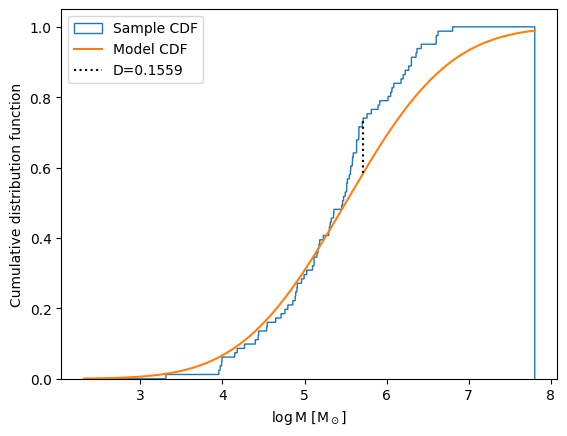

In [43]:
bins = np.linspace(min(log_masses)-1, max(log_masses)+1, 10000)
xx = (bins[1:] + bins[:-1]) / 2.0

model_cdf = st.norm.cdf(xx, loc=model_mean, scale=model_std)
plt.figure()
sample_cdf, _, _ = plt.hist(log_masses, bins=bins, density=True, cumulative=1, 
                            histtype="step", label="Sample CDF")

# where is the maximum difference between the model and sample CDFs?
where_max_d = np.argmax(np.abs(model_cdf - sample_cdf))

# find the height of the CDFs at their furthest point
D1, D2 = model_cdf[where_max_d], sample_cdf[where_max_d]

# the maximum difference
D = abs(D1 - D2)

plt.plot(xx, model_cdf, label="Model CDF")
plt.plot([xx[where_max_d]]*2, [D1, D2], "k:", label="D={:.4g}".format(D))
plt.xlabel("$\log M\ [M_\odot]$")
plt.ylabel("Cumulative distribution function")
plt.legend(loc="upper left")
plt.show()

# Exercise 2: Perform a Kolmogorov-Smirnoff test

Test whether the log masses of the GCs follow the model's distribution. Use https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html to find out the syntax of the `scipy` function.

In [44]:
# perform the K-S test
model_distribution = st.norm(model_mean, model_std)
st.kstest(log_masses, model_distribution.cdf)

KstestResult(statistic=0.1558856968871586, pvalue=0.03478135019967103, statistic_location=5.714329759745233, statistic_sign=1)

<font size=3><u>**In-class discussion: Why do we get a different $p$-value with the K-S test?**</u><font>

_Discuss with your teammate, then report._

<details>
<summary><b>[Spoiler]</b></summary>
<br>
It's not that one method is incorrect! The questions are different, i.e., we tested different hypotheses!

With the Shapiro-Wilk test we tested if the data are normally distributed, whatever the mean and standard deviation. With the K-S test we tested if the data follow a very specific normal distribution with a defined mean and standard deviation.
<br>

# What if there is no standard hypothesis test for our case?

Question: Is the maximum mass consistent to the expectation from the model?

Why would we use the statistic of `max` in astronomical data?

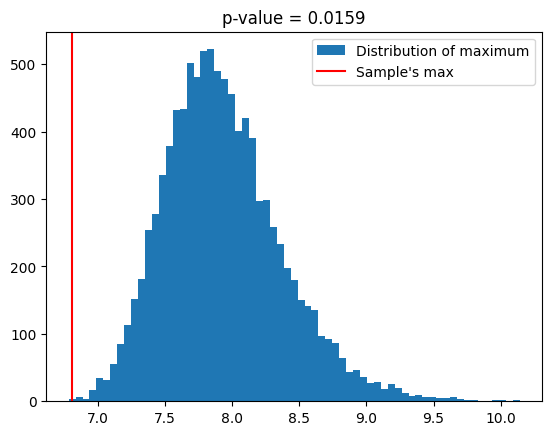

In [70]:
# plt.figure()
# plt.hist(log_masses, bins=20)
# plt.xlabel("$\log M\ [M_\odot]$")
# plt.ylabel("Number of globular clusters")
# plt.show()

def the_statistic(sample):
    return np.max(sample)

sample_size = len(log_masses)
sample_max = the_statistic(log_masses)
n_iterations = 10000

model_distribution = st.norm(model_mean, model_std)
max_samples = np.array([the_statistic(model_distribution.rvs(size=sample_size)) for _ in range(n_iterations)])

expected_max = np.mean(max_samples)
dist_from_expected_max = abs(expected_max - sample_max)
p_value = np.mean((max_samples < expected_max - dist_from_expected_max) | (max_samples > expected_max + dist_from_expected_max))

plt.figure()
plt.title(f"p-value = {p_value:.4f}")
plt.hist(max_samples, bins="fd", label="Distribution of maximum")
plt.axvline(sample_max, color="r", label="Sample's max")
plt.legend(loc="best")
plt.show()